#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=["SalePrice"])
y_train = train["SalePrice"]

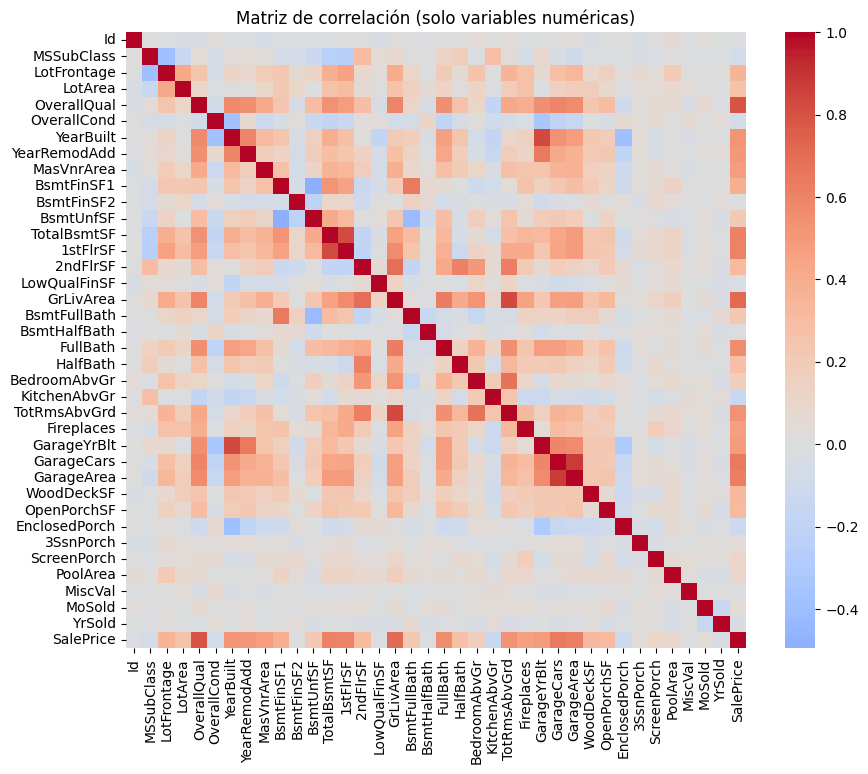

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
numeric_train = train.select_dtypes(include=["int64", "float64"])

# Calcular matriz de correlación
corr_matrix = numeric_train.corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

print(X_train.info())
print(X_train.describe())
print(X_train.isnull().sum().sort_values(ascending=False).head())
print(test.isnull().sum().sort_values(ascending=False).head())

In [4]:
threshold = len(X_train) * 0.3
cols_to_drop = X_train.columns[X_train.isnull().sum() > threshold]
X_train = X_train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)
    test[col] = test[col].fillna(median)

cat_cols = X_train.select_dtypes(include=["object"]).columns
for col in cat_cols:
    X_train[col] = X_train[col].fillna("None")
    test[col] = test[col].fillna("None")

train = train[train["GrLivArea"] < 4000]
X_train = train.drop(columns=["SalePrice"])
y_train = train["SalePrice"]

In [5]:
for df in [X_train, test]:
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    df["Age"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
    df["HasGarage"] = (df["GarageArea"] > 0).astype(int)

y_train = np.log1p(y_train) 

In [6]:
combined = pd.concat([X_train, test], axis=0)
encoded = pd.get_dummies(combined, drop_first=True)

X_train_encoded = encoded.iloc[:len(X_train), :]
X_test_encoded = encoded.iloc[len(X_train):, :]

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

imputer = SimpleImputer(strategy="median")
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

selector = SelectKBest(score_func=f_regression, k=150)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X_train_encoded.columns[selector.get_support()]

In [8]:
model = Ridge(alpha=10)
model.fit(X_train_selected, y_train)

y_train_pred = model.predict(X_train_selected)

rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring="r2")

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 0.10
MAE: 0.07
R²: 0.9352


                  Feature  Coefficient
34            MSZoning_RL     0.108831
35            MSZoning_RM     0.083483
3             OverallQual     0.067802
12              GrLivArea     0.063022
32            MSZoning_FV     0.056616
28                TotalSF     0.039613
45   Neighborhood_Crawfor     0.031475
33            MSZoning_RH     0.029756
148  SaleCondition_Normal     0.029331
127     GarageType_Attchd     0.028793


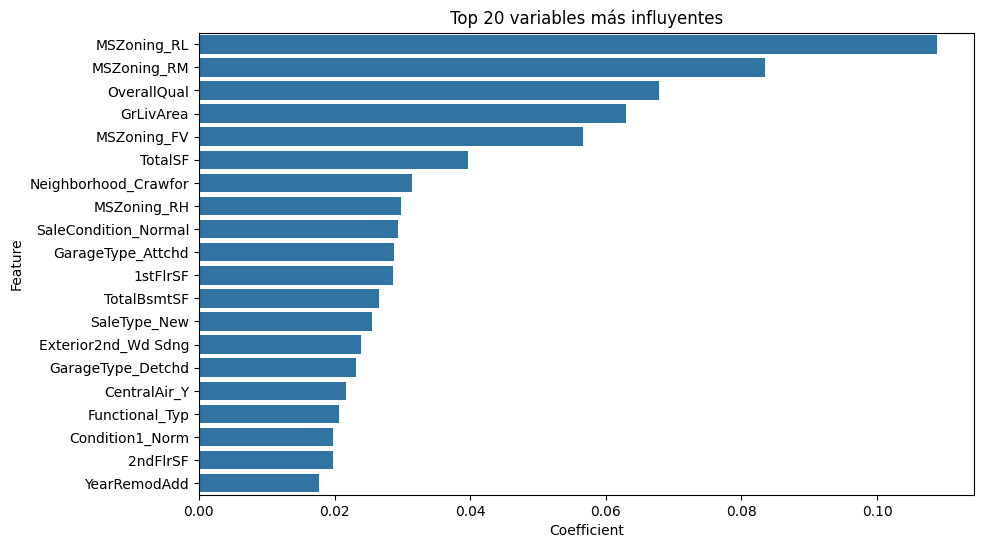

In [9]:
coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df.head(20))
plt.title("Top 20 variables más influyentes")
plt.show()

In [15]:
y_test_pred = np.expm1(model.predict(X_test_selected))

output = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred
})

output.to_csv("predicciones.csv", index=False)

print("Archivo 'predicciones.csv' generado con éxito ✅")

Archivo 'predicciones.csv' generado con éxito ✅


# Toma tu Kaggle perro

## Puntaje 

![Puntajes Kaggle](evidencialab.png)

---

## Ranking 

![Posición Kaggle](evindecia2.jpg)